# Regresión Múltiple

>Este tutorial es una selección y adaptación al español de los libros [Multivariate Data Analysis](https://www.cengage.co.uk/books/9781473756540/) de Joseph F. Hair et al. y [Applied Regression Analysis & Generalized Linear Models](https://socialsciences.mcmaster.ca/jfox/Books/Applied-Regression-3E/index.html) de John Fox.

## Nociones previas

Consideremos los registros de peso de un estudio con mujeres que practican ejercicio usando un gráfico de dispersión:

In [2]:
import pandas as pd

df = pd.read_csv(
    "https://socialsciences.mcmaster.ca/jfox/Books/Applied-Regression-3E/datasets/Davis.txt",
    sep=r"\s{1,}",
    engine="python",
)
davis_data = df[df["sex"] == "F"]
davis_data = davis_data.query("weight < 100")
davis_data

,sex,weight,height,reportedWeight,reportedHeight
2,F,58,161,51.0,159.0
3,F,53,161,54.0,158.0
5,F,59,157,59.0,155.0
13,F,51,161,52.0,158.0
14,F,64,168,64.0,165.0
...,...,...,...,...,...
188,F,58,169,54.0,166.0
190,F,50,158,49.0,155.0
193,F,59,164,59.0,165.0
194,F,51,156,51.0,158.0


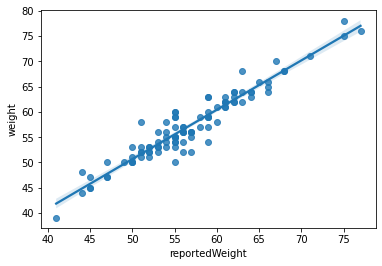

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x="reportedWeight", y="weight", data=davis_data)
plt.show()

La relación entre el peso medido y el informado parece ser lineal, por lo que es razonable ajustar una línea al gráfico. Una línea nos ayudará a determinar si los sujetos del estudio de Davis fueron informadores precisos e imparciales de sus pesos, y puede proporcionar una base para predecir el peso medido de mujeres similares para las que solo está disponible el peso informado.

Denotando el peso medido por Y y el peso reportado por X, una línea que relaciona las dos variables tiene la ecuación:

$$ Y = A + BX $$

Sin embargo, es obvio que ninguna línea puede atravesar perfectamente todos los puntos de datos, a pesar de la fuerte relación lineal entre estas dos variables. Introducimos un residuo, E, en la ecuación de regresión para reflejar este hecho:

$$ Y_{i} = A + BX_{i} + E_{i} $$
$$ Y_{i} = \hat{Y_{i}} + E_{i} $$

donde $ \hat{Y_{i}} = A + BX_{i} + E_{i} $ es el valor ajustado para la observación i.

Veamos esta representación de manera geométrica:

<p align="center">
  <img width="500" src="https://github.com/renatoparedes/EstadisticaYPsicologiaMatematica/raw/main/Regresiones/regresiongeometry.png" alt="Variable Types">
</p>



La imagen muestra que el residuo 

$$ E_{i} = Y_{i} - \hat{Y_{i}} = Y_{i} - (A + BX_{i})  $$

es la distancia vertical con signo entre el punto y la línea; es decir, el residuo es negativo cuando el punto está debajo de la línea y positivo cuando el punto está por encima de la línea.

En primer lugar, queremos residuos que sean de pequeña magnitud, porque los residuos negativos grandes son tan ofensivos como los positivos grandes.

Inmediatamente se presentan dos posibilidades: podemos emplear las distancias verticales sin signo entre los puntos y la línea, es decir, los valores absolutos de los residuales, o podemos emplear los cuadrados de los residuales.

La primera posibilidad conduce a una regresión de valor mínimo absoluto (LAV): $ \sum \left | E_{i} \right | $

La segunda posibilidad conduce al criterio de mínimos cuadrados: $\sum  E_{i}^{2}$

Los cuadrados son más manejables matemáticamente que los valores absolutos, por lo que aquí nos centraremos en los mínimos cuadrados.

El criterio de mínimos cuadrados minimiza la suma de los residuos cuadrados en todas las observaciones; es decir, buscamos los valores de A y B que minimicen:

$$ SS_{error} =  \sum_{i=1}^{n}  E_{i}^{2} = ( Y_{i} - \hat{Y_{i}} )^{2} $$

$$ SS_{error} = \sum (Y_{i} - A - BX_{i})^{2} $$

Aplicando un poco de cálculo, se puede llegar a que los coeficientes que minimizan esta expresión son los siguientes:

$$ A = \bar{Y} - B\bar{X} $$

$$ B =  \frac{\sum ( X_{i} - \bar{X} ) (Y_{i} - \bar{Y})}{\sum(X_{i} - \bar{X})^{2}}    $$


Para evaluar la bondad de ajuste de nuestro modelo, necesitamos apreciarlo en perspectiva. Para ello podemos tomar la suma de cuadrados (o varianza) total de nuestros datos:

$$ SS_{total} = (Y_{i} - \bar{Y})^{2}  $$

y la suma de cuadrados del modelo (o varianza explicada):

$$ SS_{model} = (\hat{Y_{i}} - \bar{Y})^{2} $$

Podemos compararlas evaluando su ratio:

$$ R^{2} = \frac{SS_{model}}{SS_{total}} = 1 - \frac{SS_{error}}{SS_{total}} $$

A esta descomposición de la variación total en componentes "explicados" y "no explicados" se le denomina *análisis de varianza* de la regresión: 

$$ SS_{total} = SS_{model} + SS_{error} $$

En general, podemos extender las nociones de la regresión lineal a varias variables explicativas de manera sencilla. Para el caso general de k variables explicativas, la ecuación de regresión múltiple es:

$$ Y_{i} = A + B_{1}X_{i1} + B_{2}X_{i2} + ... + B_{k}X_{ik} + E_{i} $$
$$ Y_{i} = \hat{Y_{i}} + E_{i} $$

Y la suma de cuadrados de los residuos:

$$ SS_{error} = \sum [ (Y_{i} - ( A + B_{1}X_{1i} + B_{2}X_{i2} + ... + B_{k}X_{ik}) ] ^{2} $$

Las variables, como X e Y en la regresión simple, pueden tratarse como vectores — $\mathbf{x}$ e $\mathbf{y}$ — en el espacio n-dimensional cuyos ejes están dados por las observaciones. Escrito en forma vectorial, el modelo de regresión simple es:

$$ \mathbf{y} = \alpha \mathbf{1_{n}} + \beta \mathbf{x} + \epsilon $$

Entonces, la regresión por mínimos cuadrados

$$ \mathbf{y} = \mathbf{A1_{n}} + B\mathbf{x} + \mathbf{e} $$

Se encuentra proyectando $\mathbf{y}$ ortogonalmente sobre el plano generado por $\mathbf{1_{n}}$ y $\mathbf{x}$, minimizando así la suma de los residuos al cuadrado $ \left \| \mathbf{e} \right \|^{2}$.

Veámoslo graficamente a partir de estas imágenes tomadas de Fox (2016): 

<p align="center">
  <img width="500" src="https://github.com/renatoparedes/EstadisticaYPsicologiaMatematica/raw/main/Regresiones/regresionvectorgeometry.png" alt="Variable Types">
</p>

Podemos apreciar que minimizar la suma residual de cuadrados equivale a hacer que el vector $\mathbf{e}$ sea lo más corto posible. Y que el vector $\mathbf{ \hat{y} }$ es la proyección ortogonal de $\mathbf{y}$ en el plano formado por {$  \mathbf{1_{n}}, \mathbf{x}$ }.

Podemos simplificar la representación vectorial de la regresión simple eliminando el regresor constante $1_{n}$ y el coeficiente de intersección *A*. Esto se logra centrando los vectores en la media:

<p align="center">
  <img width="500" src="https://github.com/renatoparedes/EstadisticaYPsicologiaMatematica/raw/main/Regresiones/regresionvectorgeometrysimple.png" alt="Variable Types">
</p>

Podemos apreciar que la correlación entre X e Y es el coseno del ángulo W que separa los vectores $\mathbf{x^{\star}}$ e $\mathbf{y^{\star}}$.

Veamos ahora la formulación del modelo de regresión en su forma matricial:

$$ \begin{bmatrix} Y_{1} \\ Y_{2} \\ \vdots \\ Y_{n} \end{bmatrix} = \begin{bmatrix} 1 & x_{11} & \cdots & x_{1k} \\ 1 & x_{21} & \cdots & x_{2k}\\ \vdots & \vdots & & \vdots\\ 1 & x_{n1} & \cdots & x_{nk} \end{bmatrix} \begin{bmatrix} \beta_{0}\\ \beta_{1}\\ \vdots\\ \beta_{n} \end{bmatrix} + \begin{bmatrix} \epsilon_{1}\\ \epsilon_{2}\\ \vdots\\ \epsilon_{n} \end{bmatrix} $$



$$ \mathbf{y} = \mathbf{X} \mathbf{\beta} + \mathbf{\epsilon}  $$ 

donde: 
- $\mathbf{y}$ es un vector $n \times 1$ de observaciones de variables de respuesta;
- $\mathbf{X}$ es una matriz de regresores $ n \times k + 1 $ (denominada matriz modelo), que incluye una columna inicial de 1 para el regresor constante; 
- $\mathbf{\beta}$ es un vector $k + 1 \times 1$ de parámetros a estimar; 
- $\mathbf{\epsilon}$ un vector de errores $n \times 1$.

Y el ajuste por el método de mínimos cuadrados:

$$ \mathbf{y} = \mathbf{X} \mathbf{b} + \mathbf{e}  $$ 

$$ \mathbf{b} = (\mathbf{X}^\mathsf{T} \mathbf{X})^{-1} \mathbf{X^\mathsf{T}} \mathbf{y}  $$ 

Ahora veamos un ejemplo. Considerando el siguiente modelo de regresión múltiple:

$$ Y_{Depression} = B_{0} + B_{Fatalism} X_{Fatalism} + B_{Simplicity} X_{Simplicity} $$

Vamos a calcular los coeficientes de regresión a través del método de mínimos cuadrados empleando álgebra de matrices:

In [4]:
df = pd.read_csv(
    "https://socialsciences.mcmaster.ca/jfox/Books/Applied-Regression-3E/datasets/Ginzberg.txt",
    sep=r"\s{1,}",
    engine="python",
)
ginzberg_data = df.drop(columns=["simplicity", "fatalism", "depression"])
ginzberg_data.rename(
    columns={
        "adjsimplicity": "simplicity",
        "adjfatalism": "fatalism",
        "adjdepression": "depression",
    },
    inplace=True,
)
ginzberg_data

,simplicity,fatalism,depression
1,0.75934,0.10673,0.41865
2,0.72717,0.99915,0.51688
3,0.62176,0.03811,0.70699
4,0.83522,0.42218,0.65639
5,0.47697,0.81423,0.53518
...,...,...,...
78,0.72117,1.50039,1.14913
79,1.59752,2.05016,1.16443
80,2.39515,0.88910,2.24452
81,1.31493,1.04058,1.37153


In [9]:
design_matrix

,constant,fatalism,simplicity
1,1.0,0.10673,0.75934
2,1.0,0.99915,0.72717
3,1.0,0.03811,0.62176
4,1.0,0.42218,0.83522
5,1.0,0.81423,0.47697
...,...,...,...
78,1.0,1.50039,0.72117
79,1.0,2.05016,1.59752
80,1.0,0.88910,2.39515
81,1.0,1.04058,1.31493


In [5]:
import numpy as np

# Creamos la matriz de diseño X
design_matrix = ginzberg_data[["fatalism", "simplicity"]]
design_matrix.insert(0, "constant", np.ones(design_matrix.shape[0]))
X = design_matrix.values

# Definimos nuestra variable dependiente
y = ginzberg_data["depression"].values

# Calculamos los coeficientes
b = np.linalg.inv(X.T @ X) @ X.T @ y
print("b:", b)

b: [0.24923435 0.38445745 0.36630846]


## Diseño de un modelo de regresión múltiple

La adaptabilidad y la flexibilidad son dos razones principales para el uso generalizado de la regresión múltiple en una amplia variedad de aplicaciones. Como verás en las siguientes secciones, la regresión múltiple puede representar una amplia gama de relaciones de dependencia. Al hacerlo, el investigador incorpora tres características:

- Tamaño de muestra
- Transformaciones de datos
- Naturaleza de la relación de las variables independientes

### Tamaño de muestra

El investigador siempre debe estar consciente de la potencia estadística anticipada de cualquier análisis de regresión múltiple propuesto. Para ello tomemos como referencia la siguiente tabla tomada de Hair et al. (2019):

<p align="center">
  <img width="500" src="https://github.com/renatoparedes/EstadisticaYPsicologiaMatematica/raw/main/Regresiones/regresionstatisticalpower.png" alt="Variable Types">
</p>

La tabla muestra el $R^{2}$ mínimo que se puede encontrar estadísticamente significativo con una potencia de .80 para diferentes números de variables independientes y tamaños de muestra. 

Adicionalmente, se recomienda considerar un **ratio de observaciones a variables de 5:1**, pero la relación preferida es 15:1 o 20:1.

Esto permite maximizar los grados de libertad, lo cual mejora la generalización y aborda tanto la parsimonia del modelo como preocupaciones sobre el tamaño de la muestra.

### Transformaciones de datos

Un problema que a menudo enfrentan los investigadores es el deseo de incorporar datos no métricos, como género u ocupación, en una ecuación de regresión. Sin embargo, como ya comentamos, la regresión se limita a los datos métricos.

¿Qué podemos hacer cuando las variables independientes no son métricas y tienen dos o más categorías?

Podemos emplear **variables dicotómicas, conocidas como variables ficticias, que pueden actuar como variables independientes de reemplazo**. Cada variable ficticia representa una categoría de una variable independiente no métrica, y cualquier variable no métrica con k categorías se puede representar con k-1 variables ficticias.

La forma más común es la codificación de indicadores en la que cada categoría de la variable no métrica está representada por 1 o 0. 

### Efectos moderadores 

¿Qué pasa si una relación de variable independiente-dependiente se ve afectada por otra variable independiente? Esta situación se denomina efecto moderador y se produce cuando la variable moderadora, una segunda variable independiente, cambia la forma de la relación entre otra variable independiente y la variable dependiente. También se conoce como efecto de interacción y es similar al término de interacción que se encuentra en ANOVA y MANOVA.

La relación moderadora puede expresarse de la siguiente forma:

$$ Y = B_{0} + B_{1}X_{1} + B_{2}X_{2} + B_{3}X_{1}X_{2} $$

donde:

- $B_{0}$: intercepto
- $B_{1}X_{1}$: efecto lineal de $X_{1}$
- $B_{2}X_{2}$: efecto lineal de $X_{2}$
- $B_{3}X_{1}X_{2}$: efecto moderador de $X_{2}$ en $X_{1}$ 

### Mediación

La mediación ocurre cuando el efecto de una variable independiente puede "funcionar" a través de una variable mediadora para predecir la variable dependiente. En esta situación, la variable independiente puede tener un efecto directo sobre la medida dependiente, así como un efecto indirecto a través de la variable mediadora sobre la variable dependiente. Revisaremos más sobre este concepto en la sección de modelos de ecuaciones estructurales.

En general, la selección de una variable para que sea mediadora o moderadora debe basarse en fundamentos conceptuales más que empíricos.


## Supuestos de un modelo de regresión múltiple

Los supuestos que se examinarán se encuentran en cuatro áreas:

- Linealidad del fenómeno medido
- Varianza constante de los términos de error
- Normalidad de la distribución del término de error
- Independencia de los términos de error.

En general, **se evalúa en los residuos**. Es decir, en la diferencia entre los valores observados y los valores predichos para la variable dependiente. Para ello, podemos optar por estrategias gráficas e inferenciales.

Para la evaluación gráfica basta aplicar los mismos principios que revisamos en la Unidad 2, pero aplicados al gráfico de residuales:

<p align="center">
  <img width="500" src="https://github.com/renatoparedes/EstadisticaYPsicologiaMatematica/raw/main/Regresiones/residualsgraphs.png" alt="Variable Types">
</p>

Revisemos estos cuatro criterios en nuestro ejemplo:

$$ Y_{Depression} = B_{0} + B_{Fatalism} X_{Fatalism} + B_{Simplicity} X_{Simplicity} $$

In [5]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm

# Fit regression model
model = smf.ols("depression ~ fatalism + simplicity", data=ginzberg_data).fit()

### Linealidad

La linealidad de la relación entre las variables dependientes e independientes representa el grado en que el cambio en la variable dependiente está asociado con la variable independiente. 

En casos de no linealidad, se puede optar por prescindir de la variable que produce la no linealidad, transformar los datos o agregar términos que corrijan esta falta de linealidad. 

Visualicemos la linealidad de los residuos en nuestro ejemplo: 

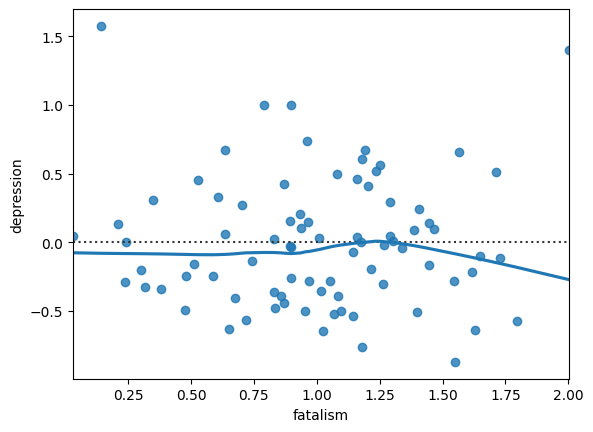

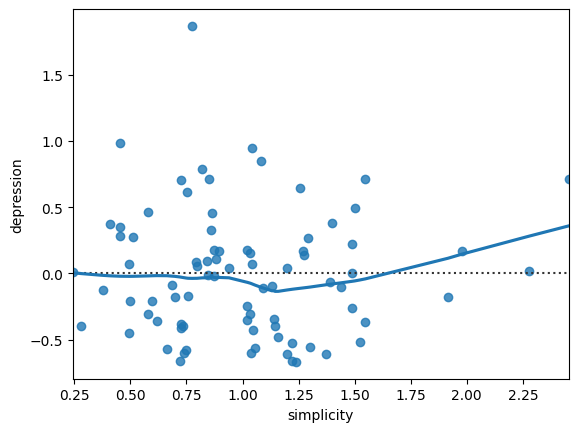

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(1)
sns.residplot(
    x="fatalism",
    y="depression",
    x_partial="simplicity",
    data=ginzberg_data,
    lowess=True,
)
plt.xlabel("fatalism")
plt.figure(2)
sns.residplot(
    x="simplicity",
    y="depression",
    x_partial="fatalism",
    data=ginzberg_data,
    lowess=True,
)
plt.xlabel("simplicity")
plt.show()

Aquí podemos apreciar que posiblemente existe una estructura en los residuos, dado que la linea entera se desvía ligeramente de la línea punteada (que representa el valor predicho por el modelo) para cada regresor (variable independiente predictora). Para el caso de la variable `simplicity` se trata de una desviación importante.

Podemos confirmar nuestra apreciación gráfica con la Prueba del multiplicador de Harvey-Collier, que evalúa la hipótesis nula de que la especificación lineal es correcta.

In [7]:
# Inspect linearity
name = ["t value", "p value"]
test = sms.linear_harvey_collier(model)
list(zip(name, test))

[('t value', 4.990214882982904), ('p value', 3.581697397195157e-06)]

Según la prueba de Harvey-Collier, el supuesto de linealidad no se cumpliría en nuestros datos. Para efectos de este ejemplo continuaremos el análisis con los datos tal como están.

### Homocedasticidad de los residuos

La presencia de variaciones desiguales (heterocedasticidad) es una de las violaciones de supuestos más comunes. En estos casos, los términos de error (residuos) no son constantes en todo el rango de la variable independiente. Esta **falta de varianza constante** en los residuos no sesga los coeficientes estimados, pero sí **causa una estimación inexacta de los errores estándar de las estimaciones**. 

Cuando se detecta heterocedasticidad de los residuos, puede optarse por usar un estimador que sea robusto a esta. Por ejemplo, HC3 o HAC.

Evaluemos este supuesto en nuestro ejemplo. Para ello, aplicaremos la prueba de Breusch-Pagan:

In [8]:
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(model.resid, model.model.exog)
list(zip(name, test))

[('Lagrange multiplier statistic', 8.529338306429969),
 ('p-value', 0.014056516917251134),
 ('f-value', 4.58562445659135),
 ('f p-value', 0.013057315679233425)]

Según esta prueba, podemos rechazar la hipótesis nula de que las varianzas de los residuos son homogéneas. Para verificar, veamos una prueba alternativa, la prueba de Goldfeld-Quandt:

In [9]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
list(zip(name, test))

[('F statistic', 6.043328223588672), ('p-value', 1.0262518893558887e-07)]

Esta prueba nos indica que podemos rechazar la hipótesis nula de homogeneidad de varianzas de los residuos. Correspondería re-espeficiar el modelo y utilizar un estimador que sea robusto a la heterocedasticidad.

### Normalidad de los residuos

Si bien técnicamente el supuesto de normalidad se aplica solo a los residuos, cualquier intento de remediar la no normalidad implica evaluar la no normalidad de las variables independientes o dependientes o ambas.

Evaluemos gráficamente la normalidad de los residuos:

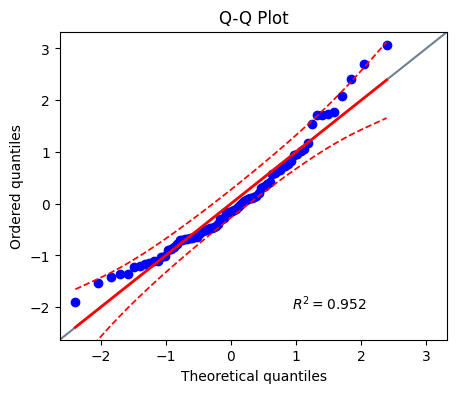

In [10]:
import pingouin as pg

pg.qqplot(model.resid)
plt.show()

Gráficamente vemos que los residuos de alejan de la normalidad, aunque puede todavía estar dentro de los límites tolerables (líneas rojas punteadas).

Evaluemos este supuesto en nuestro ejemplo con la prueba de Jarque-Bera:

In [11]:
name = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
test = sms.jarque_bera(model.resid)
list(zip(name, test))

[('Jarque-Bera', 10.560741637838632),
 ('Chi^2 two-tail prob.', 0.005090542773094281),
 ('Skew', 0.8362010990797298),
 ('Kurtosis', 3.5422357970862293)]

La prueba de Jarque-Bera nos indica que no podemos asumir la normalidad de los residuos. Sin embargo, al revisar los coeficientes de asimetría (0.84) y curtosis (3.54), podemos notar que la falta de normalidad no es extrema. En este caso procederemos a continuar con el modelo de regresión asumiendo normalidad de los residuos. 

### Independencia de las observaciones

Significa que cada valor predicho es independiente (no está relacionado con ninguna otra predicción). Es decir, no están agrupados ni secuenciados por ninguna variable. 

Podemos identificar mejor tal ocurrencia trazando los residuales contra cualquier posible agrupación o variable de secuenciación. Si los residuos son independientes, el patrón debe parecer aleatorio y similar al gráfico nulo de residuos. Las infracciones se identificarán mediante un patrón constante en los residuos.

## Estimación y evaluación

En esta etapa, el investigador debe realizar tres tareas básicas:
- Seleccionar un método para especificar el modelo de regresión que se va a estimar.
- Evaluar la significancia estadística del modelo general en la predicción de la variable dependiente.
- Determinar si alguna de las observaciones ejerce una influencia indebida en los resultados.

### Especificación del modelo de regresión

Si bien el investigador puede optar por utilizar el conjunto original de variables en la estimación del modelo, las cuestiones de multicolinealidad en la mayoría de las situaciones ameritan la consideración de alguna forma de reducción dimensional. Por ejemplo, a través de un AFC o un PCA.

El enfoque más simple, aunque quizás el más exigente, para especificar el modelo de regresión es emplear un enfoque confirmatorio (también conocido como simultáneo) en el que el investigador especifica el conjunto exacto de variables independientes que se incluirán.

Otro enfoque para la selección de variables es un conjunto emergente de técnicas que actúan sobre las estimaciones de regresión reales para "reducir" las estimaciones en función de su varianza. Estas técnicas son especialmente útiles cuando (a) hay altos grados de multicolinealidad o (b) el número de variables excede el número de observaciones en la muestra. Entre estas podemos encontrar a la regresión rígida y a LASSO.

### Examinar la significancia estadística del modelo

Basados solo en una muestra, necesitamos probar la hipótesis de que nuestro modelo de regresión puede representar la población en lugar de solo nuestra muestra. Estas pruebas estadísticas adoptan dos formas básicas: una prueba de la variación explicada (coeficiente de determinación) y una prueba de cada coeficiente de regresión.

Examinemos la significancia estadística de nuestro modelo. Para ello, definimos el modelo de regresión y lo ajustamos a nuestros datos. Dado que no podíamos cumplir con el supuesto de homocedasticidad de los residuos, procedemos a utilizar un estimador que sea robusto a la heterocedasticidad: HC3.

In [12]:
new_model = smf.ols(
    "depression ~ fatalism + simplicity", data=ginzberg_data
).fit(cov_type="HC3")
new_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             depression   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     15.27
Date:                Tue, 18 Oct 2022   Prob (F-statistic):           2.48e-06
Time:                        07:54:59   Log-Likelihood:                -35.735
No. Observations:                  82   AIC:                             77.47
Df Residuals:                      79   BIC:                             84.69
Df Model:                           2                                         
Covariance Type:                  HC3                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2492      0.124      2.004      0.045       0.006       0.493
fatalism       0.3845      0.131      2.938      0.003       0.128       0.641
simplicity     0.3663      0.145      2.526      0.012       0.082       0.651
==============================================================================
Omnibus:                       10.510   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.561
Skew:                           0.836   Prob(JB):                      0.00509
Kurtosis:                       3.542   Cond. No.                         5.34
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

#### Importancia del modelo general

Para probar la hipótesis de que la cantidad de variación explicada por el modelo de regresión es mayor que la predicción de referencia (es decir, que $R^{2}$ es significativamente mayor que cero), el ratio F se calcula como:

$$ F_{ratio} = \frac{\frac{SS_{model}}{df_{model}}}{\frac{SS_{residual}}{df_{residual}}} $$

donde:
- $df_{model}$: # coeficientes estimados (incluido la intersección) - 1
- $df_{residual}$: $N$ - # coeficientes estimados (incluida la intersección)

Usando la distribución F, podemos hacer una prueba estadística para determinar si la razón es diferente de cero (es decir, estadísticamente significativa). En aquellos casos en los que es estadísticamente significativo, el investigador puede estar seguro de que el modelo de regresión no es específico solo para esta muestra, sino que se espera que sea significativo en múltiples muestras de esta población.

Existen tres aspectos a considerar:

- Ratio de varianzas: La parte superior de la razón F es la varianza explicada por el modelo de regresión, mientras que la parte inferior es la varianza no explicada.
- Magnitud de $R^{2}$: Cuidado de asumir siempre que los resultados estadísticamente significativos también lo son en la práctica. En muestras grandes puede observarse valores pequeños de $R^{2}$ (por ejemplo, 5% o 10%) estadísticamente significativos.
- $R^{2}$ ajustado: Se utiliza para comparar modelos de regresión.

#### Significancia de los coeficientes de regresión

Podemos considerar:
- Valor p: Evalúa la hipótesis nula de que el coeficiente es igual a cero.
- Intervalo de confianza: Un coeficiente se considera estadísticamente significativo si el intervalo de confianza no incluye cero.
- Error estándar: La variación esperada de los coeficientes estimados debido al error de muestreo. Se trata de la dispersión esperada de los coeficientes estimados a partir de muestras repetidas de este tamaño.
- Magnitud de los coeficientes: Se considera el signo y el tamaño de cualquier coeficiente significativo para asegurarse de que cumple con las necesidades prácticas de la investigación. 

En general, muestras más grandes hacen que la prueba de significancia sea más precisa.

Retomando nuestro ejemplo:

In [13]:
new_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             depression   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     15.27
Date:                Tue, 18 Oct 2022   Prob (F-statistic):           2.48e-06
Time:                        07:55:04   Log-Likelihood:                -35.735
No. Observations:                  82   AIC:                             77.47
Df Residuals:                      79   BIC:                             84.69
Df Model:                           2                                         
Covariance Type:                  HC3                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2492      0.124      2.004      0.045       0.006       0.493
fatalism       0.3845      0.131      2.938      0.003       0.128       0.641
simplicity     0.3663      0.145      2.526      0.012       0.082       0.651
==============================================================================
Omnibus:                       10.510   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.561
Skew:                           0.836   Prob(JB):                      0.00509
Kurtosis:                       3.542   Cond. No.                         5.34
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

Podemos apreciar que el modelo de regresión es estadísticamente significativo y explica el 43% de la varianza. Por otra parte, vemos que el intercepto y las dos variables predictoras son estadísticamente significativas y tienen una influencia similar en el modelo. 

### Observaciones influyentes

Se refiere todas las observaciones que tengan un **efecto desproporcionado en los resultados de la regresión**. Los dos tipos básicos se basan en la naturaleza de su impacto en los resultados de la regresión:

- Valores extremos (oultiers): Observaciones que tienen valores residuales grandes y solo pueden identificarse con respecto a un modelo de regresión específico.
- Puntos de apalancamiento (leverage): Observaciones que son distintas de las observaciones restantes basadas en sus valores de variables independientes. Impactan particularmente los coeficientes estimados. 

Una herramienta de diagnóstico particularmente útil es un gráfico de los dos elementos fundamentales de una observación influyente: valores de apalancamiento versus residuales estandarizados o studentizados. Mediante el uso de los valores de umbral para los residuos studentizados de 1,96 para el apalancamiento y las observaciones, se pueden clasificar las observaciones en una de cuatro categorías:

<p align="center">
  <img width="500" src="https://github.com/renatoparedes/EstadisticaYPsicologiaMatematica/raw/main/Regresiones/influentialobservations.png" alt="Variable Types">
</p>

Veamos las observaciones influyentes en nuestro ejemplo:

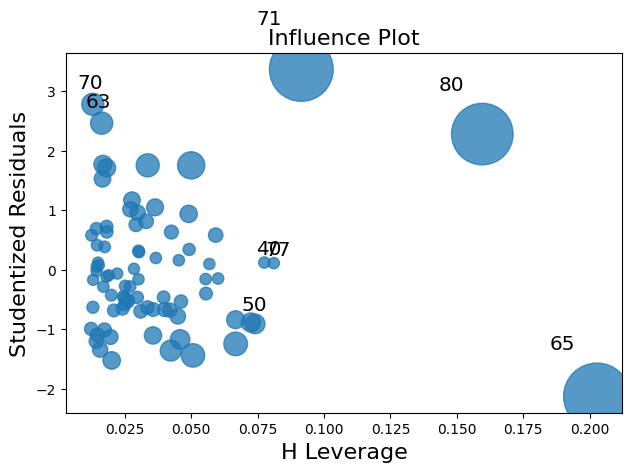

In [14]:
fig = sm.graphics.influence_plot(new_model, criterion="cooks")
fig.tight_layout(pad=1.0)

Este gráfico nos muestra que las observaciones 65 y la 80 clasifican como valores extremos y alto apalancamiento a la vez. A su vez, la observación 71 destaca por su tamaño. En este gráfico, los tamaños representan la distancia de Cook, la cual representa la influencia general de la observación en el ajuste del modelo.

De manera análoga a la unidad 2, **identificar una observación influyente no se traduce necesariamente en su eliminación. Debe analizarse su naturaleza (origen) y determinar si conviene eliminar el caso o no**. 

## Interpretación

### Importancia relativa de variables independientes

Se sugiere examinar las correlaciones bivariadas con la variable dependiente como "punto de partida" para conocer la naturaleza de las relaciones entre las variables dependientes e independientes. Para esto podemos valernos de visualizaciones. 

Veámoslo en nuestro ejemplo:

eval_env: 1
eval_env: 1
eval_env: 1


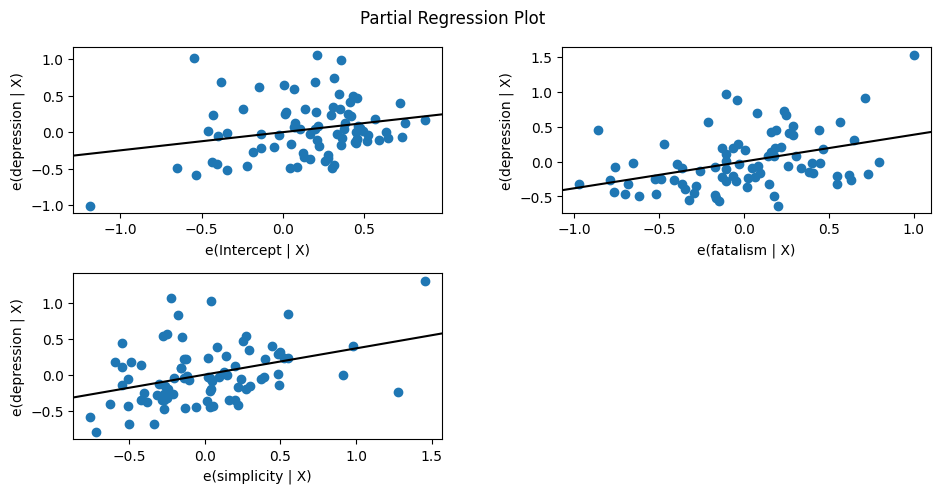

In [15]:
fig = sm.graphics.plot_partregress_grid(new_model)
fig.tight_layout(pad=1.0)
fig.set_size_inches(10, 5)

En este gráfico podemos apreciar la regresión parcial de cada variable independiente y el intercepto con la variable dependiente. Podemos apreciar una relación especialmente marcada en el caso de fatalismo. 


Se recomienda también utilizar los resultados del modelo de regresión para interpretar el impacto único de cada variable independiente en relación con las otras variables del modelo, porque la re-especificación del modelo puede tener un efecto profundo en las variables restantes. Para esto, lo sugerido es utilizar los **coeficientes beta estandarizados**. 

En nuestro ejemplo:

In [16]:
new_model.params

Intercept     0.249234
fatalism      0.384457
simplicity    0.366308
dtype: float64

Los coeficientes se encuentran estandarizados porque las variables fueron estandarizadas antes de ajustar el modelo de regresión. Podemos apreciar que fatalismo y simplicidad tienen una contribución aproximadamente equivalente al modelo.

### Multicolinealidad

Se refiere a la correlación entre las variables independientes de un modelo de regresión.

La multicolinealidad puede considerarse "buena" cuando revela un efecto supresor, pero en general se considera perjudicial porque los aumentos en multicolinealidad:

- Reducen el $R^{2}$ general que se puede lograr.
- Distorsionan la estimación de los coeficientes de regresión.
- Afectan negativamente las pruebas de significancia estadística de los coeficientes.

La multicolinealidad se mide por medio de correlaciones bivariadas entre las variables independientes, así como por la tolerancia ($1 - R^{2}$) obtenida al momento de regresionar cada variable independiente con las demás. 

Una medida asociada, el VIF, se calcula como: 

$$ VIF = \frac{1}{1 - R^{2}}$$

Valores de tolerancia hasta .10 (correspondientes a un VIF de 10) son generalmente aceptados.

Sin embargo, estos niveles casi siempre indican problemas con la multicolinealidad, incluso estos problemas también se pueden ver en niveles mucho más bajos de colinealidad y multicolinealidad:

- Las correlaciones bivariadas de .70 o más pueden resultar en problemas, e incluso correlaciones más bajas pueden ser problemáticas si son más altas que las correlaciones entre las variables independientes y dependientes.

- Los valores mucho más bajos que los umbrales sugeridos (valores VIF de incluso 3 a 5) pueden resultar en problemas interpretación o estimación, cuando las relaciones con la variable dependiente son débiles.

Una vez que se ha determinado el grado de colinealidad, el investigador tiene varias opciones:
- Eliminar las variables colineales
- Aplicar reducción de dimensiones
- Especificar técnicas de estimación
- Ignorar

Examinemos la multicolinealidad de nuestro modelo:

In [17]:
# the independent variables set
X = pd.DataFrame(new_model.model.exog, columns=model.params.index)
X.corr()

,Intercept,fatalism,simplicity
Intercept,NaN,NaN,NaN
fatalism,NaN,1.000000,0.536821
simplicity,NaN,0.536821,1.000000


Vemos una correlación fuerte entre fatalismo y simplicidad, aunque no llega al punto de corte de 0.7. Veamos ahora el coeficiente VIF:

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set
X = new_model.model.exog

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = new_model.params.index

# calculating VIF for each feature
vif_data["VIF"] = [
    variance_inflation_factor(X, i)
    for i in range(new_model.model.exog.shape[1])
]
vif_data

,feature,VIF
0,Intercept,6.269823
1,fatalism,1.404843
2,simplicity,1.404843


Las variables independientes de nuestro modelo presentan un coeficiente VIF aceptable. 

Una medida complementaria para evaluar la multicolinealidad es calcular el número de condición. Este indicador mide la sensibilidad de las estimaciones de los parámetros a pequeños cambios en la matriz de datos. 

Se calcula tomando la relación entre el valor singular más grande y el más pequeño de la descomposición del valor singular (SVD) de X.

En este caso los valores superiores a 20 son preocupantes. 

Evaluemos esta medida en nuestro ejemplo:

In [19]:
np.linalg.cond(new_model.model.exog)

5.341254786727157

El modelo presenta un número de condición aceptable.